<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 2.2.2

## Statistical Proof

### Part 1: Student's t-Test

The *t*-test is probably the most used statistical test. It measures the likelihood that a sample belongs to a given distribution, and incorporates a correction for the finite size of the sample.

#### Using the t-test to compare two means

Here, suppose we have two sets of measurements and we want to know if they both came from the same distribution.

For example, in [this](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data) dataset these could be age of house in one group and median value of house in another group, and we are testing the null hypothesis that there is no difference between the two groups.

#### Collect Data

You can find the original data [here](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data).

Data dictionary is available [here](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html).

In [350]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import pandas as pd

from scipy import stats
from matplotlib import pyplot as plt

%matplotlib inline

In [486]:
names = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
data = pd.read_csv("/Users/annaxu/Downloads/DATA/housing.data", header=None, names=names, sep=r'\s+')


In [488]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [490]:
data.shape

(506, 14)

##### 1. Plot Histogram of `RM`

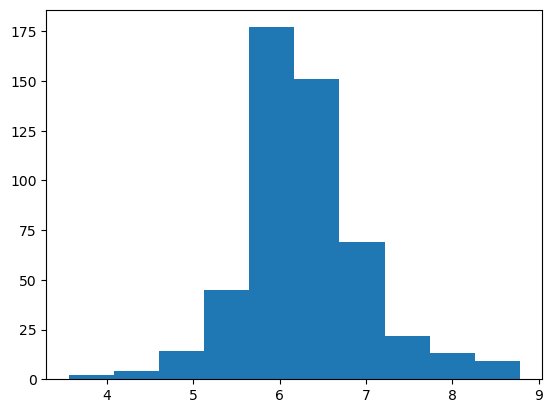

In [493]:
plt.hist(data['RM'])
plt.show()

##### 2. Plot Histogram of `MEDV`

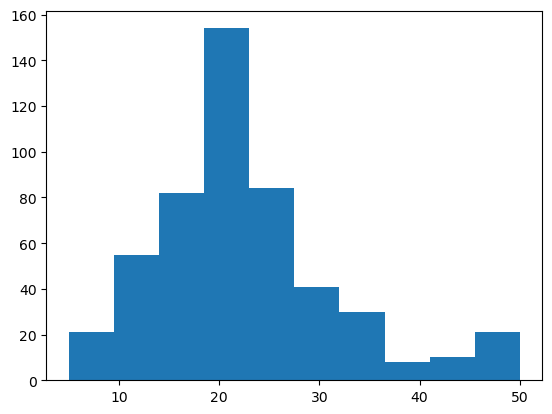

In [496]:
plt.hist(data['MEDV'])
plt.show()

##### 3.A Draw Scatter Plot of `RM` & `MEDV`

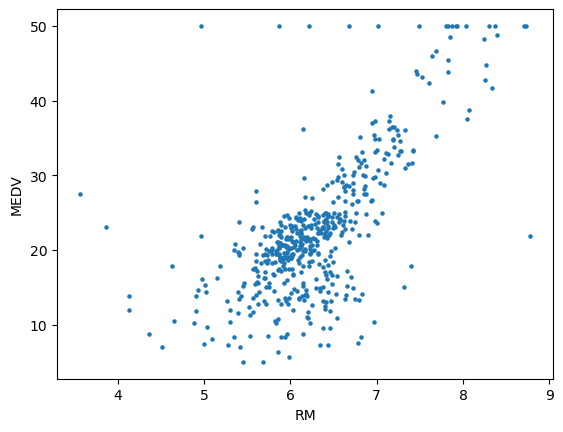

In [499]:
plt.scatter(data['RM'], data['MEDV'], s = 5)
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.show()

##### 3.B Is there any trend? State your observation.

**ANSWER:** Appears like there is a positive correlation between RM and MEDV.

We'll be using following steps:

- Define hypothesis
- Set alpha (Let alpha = 0.05)
- Calculate point estimate
- Calculate test statistic
- Find the p-value
- Interpret results

##### 4. Define Hypothesis

Let's assume if `RM` of house is more than 6, it is a large house. Otherwise the house is small. Price of houses increases when the `RM` increases.

**ANSWER:**

    H0: There is no difference in the mean of prices between the large and small houses.
    H1: There is a difference in the mean of prices between the large and small houses.
    
**[Note]** _If you want you can explore the dataset and define different hypothesis._

##### 5. Set alpha (Let alpha = 0.05)

First, we should specify our criterion for statistical significance. Traditionally, we allow for no more than a 1-in-20 chance of a spurious rejection of the null hypothesis:

In [507]:
alpha = 0.05

##### 6. Set Data

Now, let's create two sets of data
- Large House: Houses which have more than 6 rooms.
- Small House: Houses which have no more than 6 rooms.

Take sample of 100 houses in each dataset.

In [510]:
large_house = data[data['RM'] > 6].sample(n = 100)
small_house = data[data['RM'] <= 6].sample(n = 100) 
print(large_house.head())
print(small_house.head())

         CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD    TAX  \
228   0.29819   0.0   6.20     0  0.504  7.686   17.0  3.3751    8  307.0   
95    0.12204   0.0   2.89     0  0.445  6.625   57.8  3.4952    2  276.0   
288   0.04590  52.5   5.32     0  0.405  6.315   45.6  7.3172    6  293.0   
220   0.35809   0.0   6.20     1  0.507  6.951   88.5  2.8617    8  307.0   
401  14.23620   0.0  18.10     0  0.693  6.343  100.0  1.5741   24  666.0   

     PTRATIO       B  LSTAT  MEDV  
228     17.4  377.51   3.92  46.7  
95      18.0  357.98   6.65  28.4  
288     16.6  396.90   7.60  22.3  
220     17.4  391.70   9.71  26.7  
401     20.2  396.90  20.32   7.2  
         CRIM   ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
17    0.78420  0.0   8.14     0  0.538  5.990  81.7  4.2579    4  307.0   
403  24.80170  0.0  18.10     0  0.693  5.349  96.0  1.7028   24  666.0   
24    0.75026  0.0   8.14     0  0.538  5.924  94.1  4.3996    4  307.0   
484   2.37857  0.0  1

##### 6.A [BONUS] Build histogram for both `Large House` & `Small House`

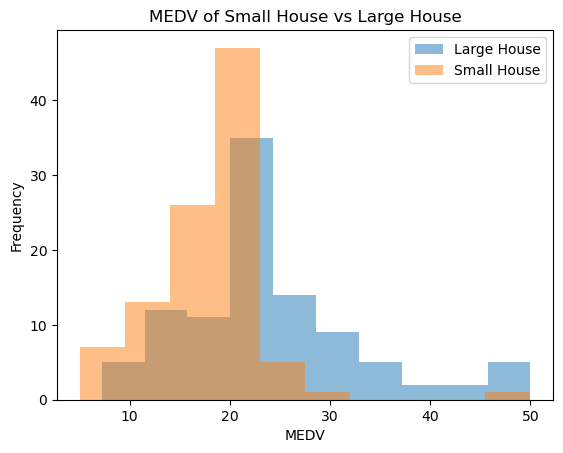

In [513]:
plt.hist(large_house['MEDV'], label = 'Large House', alpha = 0.5)
plt.hist(small_house['MEDV'], label = 'Small House', alpha = 0.5)
plt.xlabel('MEDV')
plt.ylabel('Frequency')
plt.title('MEDV of Small House vs Large House')
plt.legend()
plt.show()

##### 7. Calculate Variance

Calculate variance for both samples.

In [517]:
large_house_var = large_house['MEDV'].var()
small_house_var = small_house['MEDV'].var()
print(large_house_var)
print(small_house_var)

82.11674343434342
30.85098484848485


##### 8. Calculate Standard Deviation


Because we are dealing with two samples we need to compute the joint standard deviation.

Here sp is the pooled standard deviation for n = n1 = n2 and s^2
X1 and s^2 X2 are the unbiased estimators of the variances of the two samples.

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/f63e99c30c01445668ea2cce9832da0f6810cb4b)

In [522]:
sp = np.sqrt((large_house_var + small_house_var)/2)
print(sp)

7.515574771194425


##### 9. Calculate test statistic

The *t*-statistic depends on the difference between the sample means and their joint standard deviation:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/070d365e1b347ea5f83f0147043868fa120b6646)


In [526]:
large_house_mean = large_house['MEDV'].mean()
small_house_mean = small_house['MEDV'].mean()

t = (large_house_mean - small_house_mean)/(sp * np.sqrt(2/100))
print(t)

6.0939193091380695


##### 10. Calculate Degree of Freedom

The number of degrees of freedom is the total number of samples (here, this is N from each set) minus the number of statistics in the computation (1 for each sample mean):

In [529]:
degree_of_freedom = 2 * 100 - 2
print(degree_of_freedom)

198


In [531]:
# Degrees of freedom is the max. no. of logically independent values.
# If a dataset has 5 positive integers and a mean of 6 and 4 values are {3, 8, 5, 4}, the 5th value must be 10. 

##### 11. Find the p-value

Now we can compute the probability of the above *t*-statistic from the cumulative density function:

> stats.t.cdf

> p_value = 1 - cdf(t)

In [535]:
p_value = 1 - stats.t.cdf(abs(t), degree_of_freedom)
print(p_value)

2.826054279481127e-09


#### Interpret results

##### 12. Write a Function to Test Significance of `p_value`

Write a function which will take p_value and alpha as input. If p_value < alpha, print reject null hypothesis message. Otherwise print a fail to reject null hypothesis message.

In [539]:
def test_sig (p_value, alpha):
    if p_value < alpha:
        print ("We reject null hypothesis. There is a difference in the mean of prices between the large and small houses.")
    else:
        print ("We fail to reject null hypothesis. There is no difference in the mean of prices between the large and small houses.")

two_tailed_p_value = p_value * 2
print("p_value = " + str(p_value))
print("two_tailed_p_value = " + str(two_tailed_p_value))
print("alpha = " + str(alpha))
test_sig(two_tailed_p_value, alpha)

p_value = 2.826054279481127e-09
two_tailed_p_value = 5.652108558962254e-09
alpha = 0.05
We reject null hypothesis. There is a difference in the mean of prices between the large and small houses.


In [272]:
# When you calculate a t-statistic, the p-value you get from that statistic might only represent the area under one tail of the distribution.
# But in a two-tailed test, you're checking for differences in both directions (i.e., whether the sample mean is either significantly greater than OR significantly less than the population mean).
# Therefore, you multiply the one-tailed p-value by 2 to account for both ends (tails) of the distribution.

##### 13. [Bonus] Write a function to calculate t, p_value from two samples.

Calculate the T-test for the means of *two independent* samples of scores.

This is a two-sided test for the null hypothesis that 2 independent samples
have identical average (expected) values.

In [456]:
sample1 = data.sample(n = 100)
sample2 = data.sample(n = 100)

sample1_var = sample1['MEDV'].var(ddof=1)
sample2_var = sample2['MEDV'].var(ddof=1)

In [545]:
def t_test (sample1, sample2):
    
    sp = np.sqrt((sample1_var + sample2_var)/2)
    t = (sample1['MEDV'].mean() - sample2['MEDV'].mean())/(sp * np.sqrt(2/100))
    degree_of_freedom = 2 * 100 - 2
    p_value = 1 - stats.t.cdf(abs(t), degree_of_freedom)
    
    return t, p_value

t, p_value = t_test (sample1, sample2)
print("t = " + str(t))
print("two_tailed_p_value = " + str(p_value*2))

t = -0.3458144073290824
two_tailed_p_value = 0.729849348019157


#### Use `Stats` Package

##### 14. Calculate the T-test for the means of *two independent* samples of scores

using following method of stats calculate the T-test for the means of two independent samples of scores.

> ttest_ind

In [462]:
stats.ttest_ind(sample1['MEDV'], sample2['MEDV'], equal_var=True)

TtestResult(statistic=-0.3458144073290825, pvalue=0.7298493480191569, df=198.0)



---



---



> > > > > > > > > © 2025 Institute of Data


---



---



